In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
raw_data = pd.read_csv('epi_r.csv')

In [25]:
list(raw_data.columns)

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [53]:
#using mean to create classifier
rating_mean=np.percentile(raw_data.rating, 25)

In [54]:
#create new column
raw_data['rating_binary']=np.where(raw_data['rating']>=rating_mean,1,0)

In [55]:
# inital clean
raw_data=raw_data.drop(['title', 'calories', 'protein', 'fat', 'sodium'], 1)

KeyError: "['title' 'calories' 'protein' 'fat' 'sodium'] not found in axis"

In [56]:
# re-examine
list(raw_data.columns)

['rating',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisket',
 'broccoli',
 'broccoli rabe',
 'broil',
 'brookl

In [61]:
# see how often a feature is used
# lets use the 30 most used, not counting rating and rating_binary
raw_data.sum().sort_values().tail(50)

chill                 1126.0
potato                1128.0
ginger                1146.0
cocktail party        1154.0
soup/stew             1164.0
no-cook               1251.0
roast                 1320.0
chicken               1344.0
cheese                1355.0
lunch                 1359.0
appetizer             1372.0
thanksgiving          1458.0
dairy                 1496.0
salad                 1516.0
garlic                1643.0
herb                  1681.0
spring                1715.0
egg                   1768.0
kid-friendly          1791.0
vegan                 1851.0
fruit                 1958.0
milk/cream            1995.0
sauté                 2044.0
vegetable             2087.0
tomato                2140.0
onion                 2238.0
kidney friendly       2313.0
healthy               2351.0
sugar conscious       2466.0
dinner                2705.0
fall                  3015.0
winter                3099.0
no sugar added        3132.0
side                  3151.0
dairy free    

In [62]:
features=raw_data[['egg',
                   'kid-friendly',
                  'vegan',
                  'fruit',
                  'milk/cream',
                  'sauté',
                  'vegetable',
                  'tomato',
                  'onion',
                  'kidney friendly',
                  'healthy',
                  'sugar conscious',
                  'dinner',
                  'fall',
                  'winter',
                  'no sugar added',
                  'side',
                  'dairy free',
                  'dessert',
                  'summer',
                  'bake',
                  'wheat/gluten-free',
                  'quick & easy',
                  'pescatarian',
                  'kosher',
                  'gourmet',
                  'vegetarian',
                  'tree nut free',
                  'soy free',
                  'peanut free']]

In [63]:
features

,egg,kid-friendly,vegan,fruit,milk/cream,sauté,vegetable,tomato,onion,kidney friendly,...,bake,wheat/gluten-free,quick & easy,pescatarian,kosher,gourmet,vegetarian,tree nut free,soy free,peanut free
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
7,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0


In [64]:
from sklearn.svm import SVR
svr = SVR()
X = features
Y = raw_data.rating_binary
svr.fit(X,Y)

c:\users\family\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

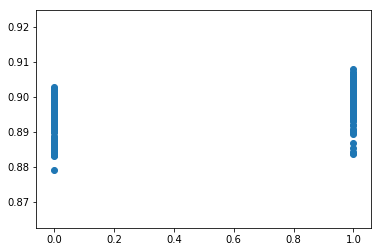

In [65]:
plt.scatter(Y, svr.predict(X))

In [66]:
svr.score(X, Y)

-0.06762747742436215

In [52]:
from sklearn.model_selection import cross_val_score
cross_val_score(svr, X, Y, cv=5)

c:\users\family\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\family\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\family\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warnin

array([-0.05953684, -0.07060808, -0.0600525 , -0.07052733, -0.07669515])